In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [10]:
from proj1_helpers import *
from data_modification import replace_by_mean
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# Replace -999 by the mean of its respective column
tX_prime = replace_by_mean(tX)


## LSE regression and Bias-Variance decomposition plot:

In [130]:
from least_squares import *
from run_lse_regression import *

# Regression for one feature at a time (HOW TO USE MULTIPLE FEATURES WITH POLYNOMIAL BASIS FUNC?)
#rmse_te_min, degree_min = run_lse_regression_bias_var(y, tX[:,2])
#print("RMSE Test Min:", rmse_te_min)
#print("Corresponding degree:", degree_min)

#loss_te, weights = run_lse(y, tX[:,2], 2)



RMSE Test Min: 0.945496643476
Corresponding degree: 2


## Ridge regression with K-fold cross-validation and Bias-Variance decomposition plot:

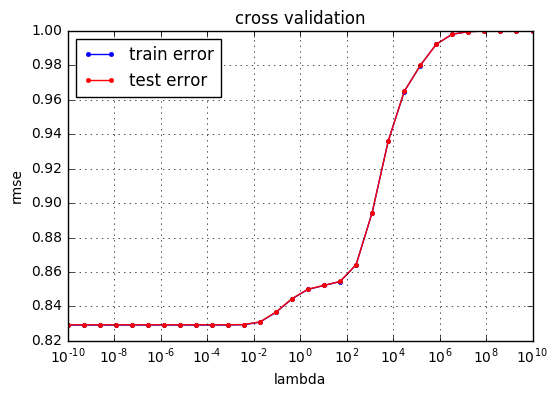

In [12]:
from run_ridge_regression import run_ridge_regression
from run_ridge_regression import run_ridge_regression_bias_var
from ridge_regression import ridge_regression

run_ridge_regression(y, tX)

#loss_ridge, weights = ridge_regression(y, tX, 0.01)

## Ridge regression Bias-Variance decomposition plot:

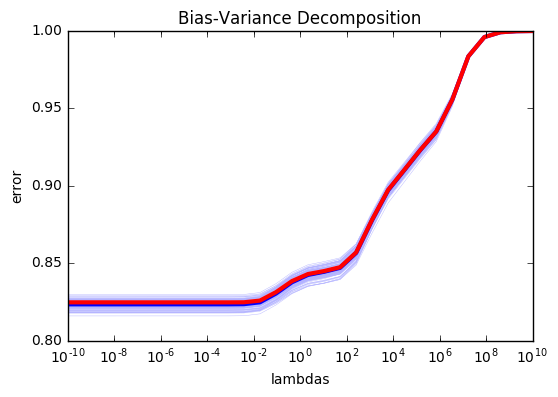

In [150]:
from run_ridge_regression import run_ridge_regression
from run_ridge_regression import run_ridge_regression_bias_var
from ridge_regression import ridge_regression

run_ridge_regression_bias_var(y, tX)

## Generate predictions and save ouput in csv format for submission:

In [65]:
DATA_TEST_PATH = '../data/test.csv' # download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [147]:
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
OUTPUT_PATH = '../data/predictions-%s-group-36.csv' % now_str
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

../data/predictions-15-10-2016_19h33_19-group-36.csv
